First we start by importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import yaml
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sys import path
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score,balanced_accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import matplotlib.pyplot as plt
    

We read the dataset and start building the prediction models

In [2]:
df1 = pd.read_csv("/Users/clara/Documents/Ironhack/Finalproject/Data/clean/Clean_Dataset.csv")

In [3]:
df1.drop("Unnamed: 0", axis = 1, inplace = True)


In [4]:
df1.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df1.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [6]:
df1.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

We check for duplicates and null values

In [7]:
df1.duplicated().sum()


0

In [8]:
df1.isnull().sum().sum()

0

* We see that there are not duplicates nor missing values

In [9]:
df1.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Then we check for any possible outliers in the dataset

* We observe that we can't find any outliers in the dataset

In [10]:
df1.corr()

/var/folders/p0/lbhs9gv11lj5k_hv1w555fs40000gn/T/ipykernel_30420/473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [11]:
df1.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

We convert the categorical columns into numerical using Label Encoder

In [12]:
for col in df1.columns:
    if df1[col].dtype=='object':
        df1[col]=le.fit_transform(df1[col])

In [13]:
df1.dtypes

airline               int64
flight                int64
source_city           int64
departure_time        int64
stops                 int64
arrival_time          int64
destination_city      int64
class                 int64
duration            float64
days_left             int64
price                 int64
dtype: object

Now we do the x y split

In [14]:
x=df1.drop(['price'],axis=1)
y=df1['price']

Price is our target variable

And now the train test split

In [15]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=20)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [16]:
x_train

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
152169,2,1071,4,2,0,3,1,1,8.75,44
255555,5,1475,0,2,0,2,4,0,24.25,43
214249,5,1497,2,4,0,0,0,0,4.83,29
5269,5,1460,2,4,0,5,5,1,11.17,27
141002,5,1449,4,2,0,5,0,1,25.67,39
...,...,...,...,...,...,...,...,...,...,...
178569,1,771,3,1,0,5,1,1,17.08,28
31962,1,729,2,2,0,5,3,1,27.08,26
220060,5,1552,2,2,0,0,3,0,17.25,18
285919,5,1522,3,0,0,5,1,0,10.17,15


In [17]:
x_test

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
278045,1,828,3,5,2,5,5,0,1.67,15
78280,1,825,5,0,0,2,1,1,27.00,9
134282,1,840,4,1,0,2,5,1,13.00,42
36777,4,1397,2,2,2,5,1,1,2.83,13
175889,3,168,3,2,2,2,4,1,2.25,46
...,...,...,...,...,...,...,...,...,...,...
266805,5,1459,4,0,0,5,5,0,6.67,41
93184,4,1304,0,4,0,2,2,1,6.25,45
271160,5,1445,4,1,0,0,3,0,5.42,21
78544,3,329,5,2,0,3,1,1,4.50,11


Then we scale the values

In [18]:
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train_scaled=mmscaler.fit_transform(x_train)
x_test_scaled=mmscaler.fit_transform(x_test)
x_train_scaled_df=pd.DataFrame(x_train)
x_test_scaled_df=pd.DataFrame(x_test)  

Now we start building our models and then I'm evaluating their performance

The first one that we are going to use is the Linear Regression Model

In [19]:
lm = LinearRegression()
lm.fit(x_train_scaled_df,y_train)
y_pred_test_lm = lm.predict(x_test_scaled_df)
print(y_pred_test_lm)

[45198.87775895  9349.13055223  4162.64190422 ... 53922.4716036
  8986.08296265  5402.86678883]


In [20]:
print("R2 Score: ",r2_score(y_test,y_pred_test_lm)) #ARRODONIR
print("Mean Squared Error is ",mean_squared_error(y_test, y_pred_test_lm))
print('Mean Absolute Error is', mean_absolute_error(y_test, y_pred_test_lm))
print('Root Mean Squared Error is', np.sqrt(mean_squared_error(y_test, y_pred_test_lm)))


R2 Score:  0.9048167220277005
Mean Squared Error is  48740881.672439694
Mean Absolute Error is 4620.654545703716
Root Mean Squared Error is 6981.467014348753


In [21]:
#sns.distplot(y_test-y_pred)
#plt.show()

Decision Tree Model

In [23]:
dt=DecisionTreeRegressor(max_features=10,max_depth=7,random_state=42)
dt.fit(x_train_scaled_df,y_train)
y_pred_test_dt = dt.predict(x_test_scaled_df)
print(y_pred_test_dt)

[20794.17263158 12111.89812368  5776.86818961 ... 52042.9503367
  8879.84202386  5776.86818961]


In [25]:
print("R2 Score: ",r2_score(y_test,y_pred_test_dt))
print("Mean Squared Error is ",mean_squared_error(y_test, y_pred_test_dt))
print('Mean Absolute Error is', mean_absolute_error(y_test, y_pred_test_dt))
print('Root Mean Squared Error is', np.sqrt(mean_squared_error(y_test, y_pred_test_dt)))

R2 Score:  0.954547790348014
Mean Squared Error is  23274894.70412124
Mean Absolute Error is 2789.527011245925
Root Mean Squared Error is 4824.406150410768


Gradient Boosting Model

In [27]:
gbre = GradientBoostingRegressor()
gbre.fit(x_train_scaled_df, y_train)
y_pred_test_gbre = gbre.predict(x_test_scaled_df)
print(y_pred_test_gbre)

[19448.37558562 11368.08368358  5544.80573273 ... 56219.02264957
  8274.45294636  5022.04247399]


In [31]:
print("R2 Score: ",r2_score(y_test,y_pred_test_gbre))
print("Mean Squared Error is ",mean_squared_error(y_test, y_pred_test_gbre))
print('Mean Absolute Error is', mean_absolute_error(y_test, y_pred_test_gbre))
print('Root Mean Squared Error is', np.sqrt(mean_squared_error(y_test, y_pred_test_gbre)))

R2 Score:  0.9573024307451373
Mean Squared Error is  21864314.98353851
Mean Absolute Error is 2800.5679590815985
Root Mean Squared Error is 4675.9293176371375


Random Forest Regressor Model

In [33]:
regr = RandomForestRegressor()
regr.fit(x_train_scaled_df, y_train)
y_pred_test_regr = regr.predict(x_test_scaled_df)
print(y_pred_test_regr)

[17777.31 12794.24  5280.72 ... 52175.    8047.84  4141.6 ]


In [34]:
print("R2 Score: ",r2_score(y_test,y_pred_test_regr))
print("Mean Squared Error is ",mean_squared_error(y_test, y_pred_test_regr))
print('Mean Absolute Error is', mean_absolute_error(y_test, y_pred_test_regr))
print('Root Mean Squared Error is', np.sqrt(mean_squared_error(y_test, y_pred_test_regr)))

R2 Score:  0.9894574805166351
Mean Squared Error is  5398550.098449273
Mean Absolute Error is 888.2363460939549
Root Mean Squared Error is 2323.478017638487


KNeighbors Regressor

In [35]:
kn=KNeighborsRegressor()
kn.fit(x_train_scaled_df,y_train)
y_pred_test_kn = kn.predict(x_test_scaled_df)
print(y_pred_test_kn)

[10827.6  9041.8 23338.  ... 33557.8  7531.   4178. ]


In [36]:
print("R2 Score: ",r2_score(y_test,y_pred_test_kn))
print("Mean Squared Error is ",mean_squared_error(y_test, y_pred_test_kn))
print('Mean Absolute Error is', mean_absolute_error(y_test, y_pred_test_kn))
print('Root Mean Squared Error is', np.sqrt(mean_squared_error(y_test, y_pred_test_kn)))

R2 Score:  0.43112602714460013
Mean Squared Error is  291305569.5092264
Mean Absolute Error is 12356.739211069898
Root Mean Squared Error is 17067.676160193172


Bagging Regressor

In [38]:
bg=BaggingRegressor()
bg.fit(x_train_scaled_df,y_train)
y_pred_test_bg = bg.predict(x_test_scaled_df)
print(y_pred_test_bg)

[17738.  12302.3  5232.5 ... 52175.   7940.2  4249.9]


In [39]:
print("R2 Score: ",r2_score(y_test,y_pred_test_bg))
print("Mean Squared Error is ",mean_squared_error(y_test, y_pred_test_bg))
print('Mean Absolute Error is', mean_absolute_error(y_test, y_pred_test_bg))
print('Root Mean Squared Error is', np.sqrt(mean_squared_error(y_test, y_pred_test_bg)))

R2 Score:  0.9885037275132094
Mean Squared Error is  5886942.211801708
Mean Absolute Error is 917.0938917079948
Root Mean Squared Error is 2426.3021682803046


Extra Trees Regressor

In [40]:
ext=ExtraTreesRegressor()
ext.fit(x_train_scaled_df,y_train)
y_pred_test_ext = ext.predict(x_test_scaled_df)
print(y_pred_test_ext)

[17738.   12974.86  5338.18 ... 52175.    8178.94  4278.22]


In [41]:
print("R2 Score: ",r2_score(y_test,y_pred_test_ext))
print("Mean Squared Error is ",mean_squared_error(y_test, y_pred_test_ext))
print('Mean Absolute Error is', mean_absolute_error(y_test, y_pred_test_ext))
print('Root Mean Squared Error is', np.sqrt(mean_squared_error(y_test, y_pred_test_ext)))

R2 Score:  0.9877875324021771
Mean Squared Error is  6253687.105493678
Mean Absolute Error is 931.9275975575447
Root Mean Squared Error is 2500.7373123728285


* It looks like the best model to predict the flight price is  Random Forest, with a R2 score of 0.9894184537936486,  
a Mean Squared Error of  5418534.6685089115, a Mean Absolute Error of 888.364458959292 and a Root Mean Squared Error of 2327.7746172060797

Now we train our model with Random Forest Regressor Model

In [42]:
#regr.fit(x_train, y_train)
#y_pred = regr.predict(x_test)
print(y_pred_test_regr)

[17777.31 12794.24  5280.72 ... 52175.    8047.84  4141.6 ]


In [43]:
out=pd.DataFrame({'Price_actual':y_test,'RF_Price_pred':y_pred_test_regr})
result=df1.merge(out,left_index=True,right_index=True)

In [44]:
result

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,RF_Price_pred
4,5,1549,2,4,2,4,5,1,2.33,1,5955,5955,7197.04
9,2,1014,2,0,2,2,5,1,2.25,1,5954,5954,6180.99
17,1,812,2,1,2,4,5,1,2.17,1,5955,5955,6348.59
18,0,1211,2,2,0,1,5,1,12.25,1,5949,5949,9780.88
20,2,982,2,1,0,2,5,1,11.75,1,5954,5954,13866.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300139,5,1488,1,2,0,2,3,0,26.42,49,51457,51457,59828.06
300145,1,716,1,4,0,4,3,0,23.08,49,51345,51345,51345.00
300147,1,776,1,1,0,5,3,0,17.25,49,68739,68739,40593.00
300148,5,1477,1,4,0,2,3,0,10.08,49,69265,69265,71348.20


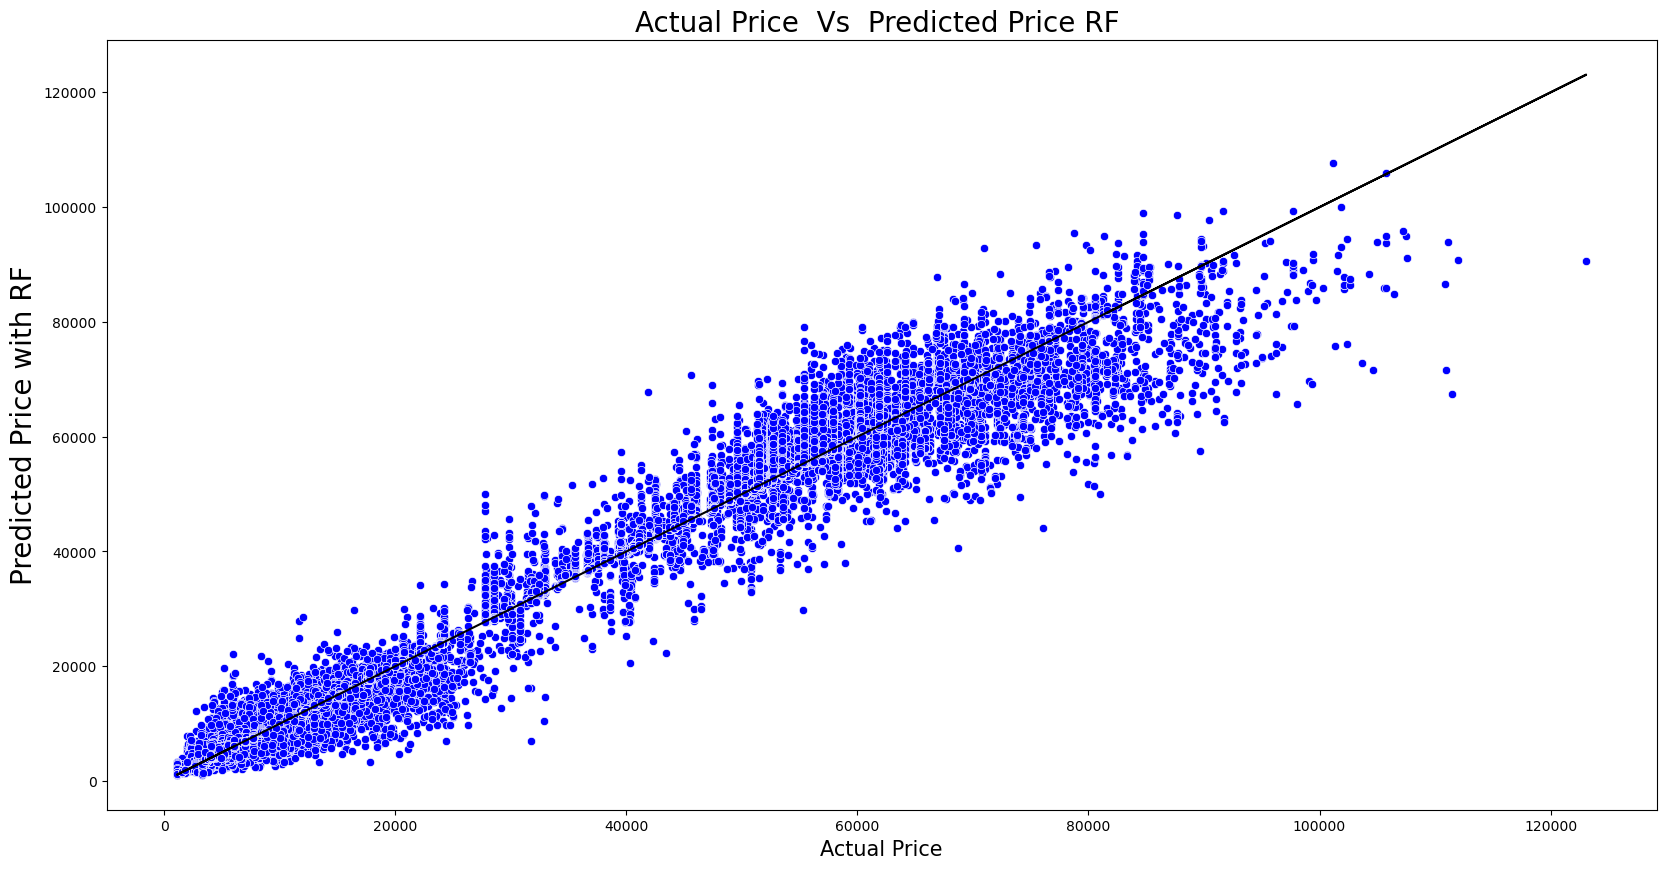

In [65]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(x='Price_actual',y='RF_Price_pred',data=result, color='blue', ax=ax)
plt.plot(result['Price_actual'],result['Price_actual'], color='black')
plt.title('Actual Price  Vs  Predicted Price RF ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price with RF',fontsize=20)
plt.savefig('/Users/clara/Documents/Ironhack/Finalproject/EDA/prediction_scatterplot')
plt.show()

Now we save all the models with pickle

In [58]:
with open('linear.pkl','wb') as f:
    pickle.dump(lm,f)
    print('dump sucess')

dump sucess


In [59]:
with open('dt.pkl','wb') as f:
    pickle.dump(dt,f)
    print('dump sucess')

dump sucess


In [60]:
with open('gbre.pkl','wb') as f:
    pickle.dump(gbre,f)
    print('dump sucess')

dump sucess


In [61]:
with open('regr.pkl','wb') as f:
    pickle.dump(regr,f)
    print('dump sucess')

dump sucess


In [62]:
with open('kn.pkl','wb') as f:
    pickle.dump(kn,f)
    print('dump sucess')

dump sucess


In [63]:
with open('bg.pkl','wb') as f:
    pickle.dump(bg,f)
    print('dump sucess')

dump sucess


In [64]:
with open('ext.pkl','wb') as f:
    pickle.dump(ext,f)
    print('dump sucess')

dump sucess
